<a href="https://colab.research.google.com/github/Kakumanu-Harshitha/Brain-Tumor-prediction/blob/main/Brain_Tumor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor prediction

# Steps to build this model
1.Import Libraries

2.Importing and Unzipping Dataset from Kaggle

3.Visualize the data

4.Load and preprocess the data

5.Split the dataset into train and test set

6.Data Argumentation

7.Build The Model

8.Compile The model

9.Fit The Model

10.Model Performance Evaluation: Accuracy and Loss over Epochs



# 1.Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2.Importing and Unzipping Dataset from Kaggle

Reference:https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

In [ ]:

!pip install kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kakumanuharshitha","key":"06de50b59fe4e1311ff0d781072953d4"}'}

navoneel/brain-mri-images-for-brain-tumor-detection

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d  navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 33% 5.00M/15.1M [00:00<00:00, 34.1MB/s]
100% 15.1M/15.1M [00:00<00:00, 86.0MB/s]


In [ ]:
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

In [ ]:
!ls

brain-mri-images-for-brain-tumor-detection.zip	brain_tumor_dataset  no  sample_data  yes


In [ ]:

data_dir = "/content/brain_tumor_dataset"
print(os.listdir(data_dir))

['yes', 'no']


In [ ]:
tumor_dir = os.path.join(data_dir, 'yes')
no_tumor_dir = os.path.join(data_dir, 'no')

print(f"Tumor images: {len(os.listdir(tumor_dir))}")
print(f"No Tumor images: {len(os.listdir(no_tumor_dir))}")

Tumor images: 155
No Tumor images: 98


#3. Visualize the dataset

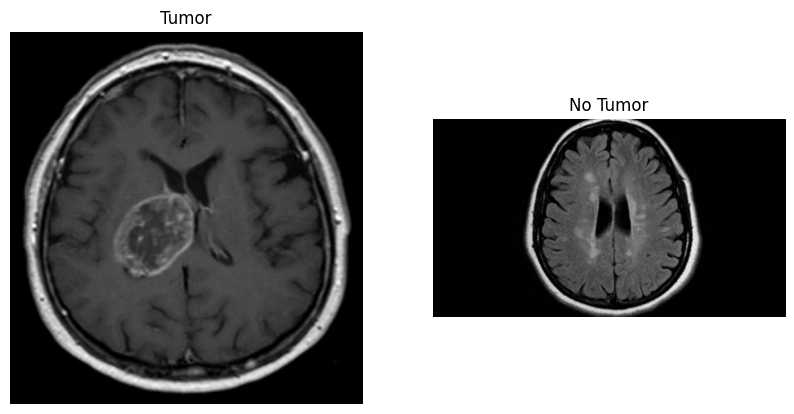

In [ ]:
import matplotlib.pyplot as plt
import cv2

sample_tumor = os.listdir(tumor_dir)[0]
sample_no_tumor = os.listdir(no_tumor_dir)[0]

tumor_image = cv2.imread(os.path.join(tumor_dir, sample_tumor))
no_tumor_image = cv2.imread(os.path.join(no_tumor_dir, sample_no_tumor))

# Convert BGR to RGB for display
tumor_image = cv2.cvtColor(tumor_image, cv2.COLOR_BGR2RGB)
no_tumor_image = cv2.cvtColor(no_tumor_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(tumor_image)
plt.title("Tumor")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(no_tumor_image)
plt.title("No Tumor")
plt.axis('off')

plt.show()

#4. Load and preprocess the data

In [ ]:
import cv2

def load_data(dir_path, label, target_size=(128, 128)):
    images = []
    labels = []
    for img_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, img_name)
        image = cv2.imread(img_path)  # Read the image
        image = cv2.resize(image, target_size)  # Resize to 128x128
        image = image / 255.0  # Normalize pixel values
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

tumor_images, tumor_labels = load_data(tumor_dir, label=1)
no_tumor_images, no_tumor_labels = load_data(no_tumor_dir, label=0)

In [ ]:
print(tumor_images.shape)
print(tumor_labels.shape)
print(no_tumor_images.shape)
print(no_tumor_labels.shape)


(155, 128, 128, 3)
(155,)
(98, 128, 128, 3)
(98,)


In [ ]:
X = np.concatenate((tumor_images, no_tumor_images), axis=0)
y = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

# 5.Split the dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6.Data Argumentation

In [ ]:

#Data augmentation (example using ImageDataGenerator)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# 7.Build The Model

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  ])


# 8.Compile The model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 9.Fit The Model

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=10,  # Adjust the number of epochs
                    validation_data=(X_test, y_test))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8178 - loss: 0.4053 - val_accuracy: 0.8026 - val_loss: 0.6236
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8854 - loss: 0.3412 - val_accuracy: 0.7895 - val_loss: 0.6276
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8061 - loss: 0.4402 - val_accuracy: 0.7632 - val_loss: 0.7842
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7892 - loss: 0.4477 - val_accuracy: 0.8158 - val_loss: 0.5979
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8068 - loss: 0.4724 - val_accuracy: 0.7763 - val_loss: 0.5861
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7770 - loss: 0.4417 - val_accuracy: 0.7763 - val_loss: 0.5806
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8172 - loss: 0.4203 - val_accuracy: 0.7237 - val_loss: 0.6344
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7891 - loss: 0.4472 - val_accuracy: 0.7895 - val_loss: 0.6358


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy :', accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8181 - loss: 0.5989
Test accuracy : 0.8157894611358643


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         802,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,696,165 (10.29 MB)

 Trainable params: 898,721 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,797,444 (6.86 MB)

# 10.Model Performance Evaluation: Accuracy and Loss over Epochs

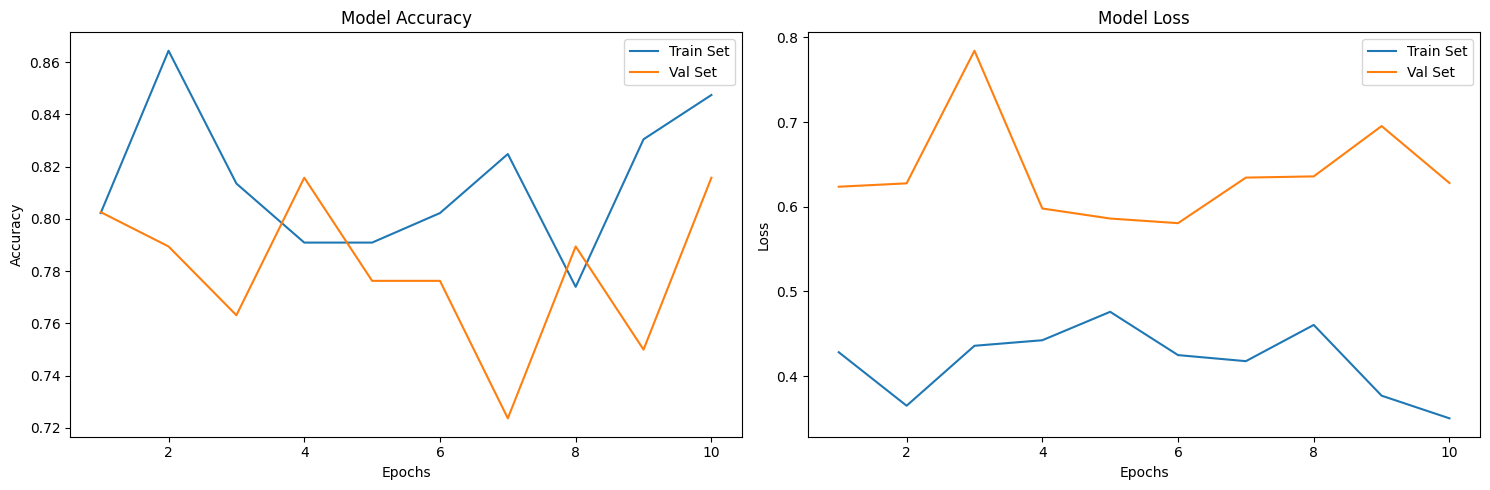

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions = [1 if x>0.5 else 0 for x in predictions]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, predictions)
print('Val Accuracy = %.2f' % accuracy)


Val Accuracy = 0.82


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77        31
           1       0.83      0.87      0.85        45

    accuracy                           0.82        76
   macro avg       0.81      0.80      0.81        76
weighted avg       0.81      0.82      0.81        76



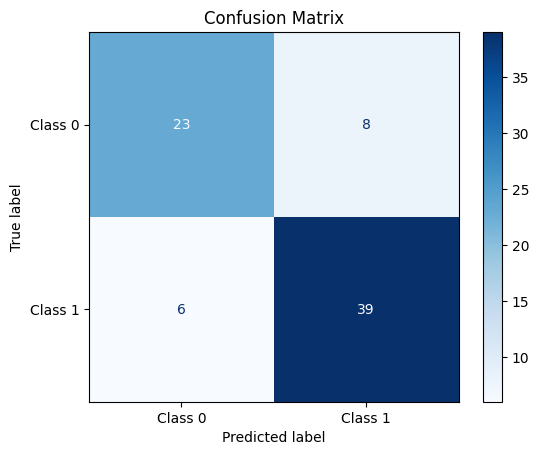

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')  # You can change the colormap if needed
plt.title('Confusion Matrix')
plt.show()